In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đọc dữ liệu
data = pd.read_csv('../datas/train_div10.csv')
data_test = pd.read_csv('../datas/test_div10.csv')

In [2]:
import sys
sys.path.append('../extraction')  

from extraction import (
    create_training_data,
    calculate_accelerometer_features,
    calculate_accelerometer_fft_features,
)

x_list, y_list, z_list, train_labels = create_training_data(
    data=data, window_size=20, step_size=10)

x_list_test, y_list_test, z_list_test, train_labels_test = create_training_data(
    data=data_test, window_size=20, step_size=10)



In [3]:
features = calculate_accelerometer_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=20)
# test
features_test = calculate_accelerometer_features(
    x_list=x_list_test, y_list=y_list_test, z_list=z_list_test, window_size=20)

c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:102: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['x_skewness'] = [stats.skew(x) for x in x_list]
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:103: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['y_skewness'] = [stats.skew(y) for y in y_list]
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:104: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['z_skewness'] = [stats.skew(z) for z in z_list]
c:\Users\Admin\Desktop

In [4]:
features = features[['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                     'y_aad', 'z_aad', 'x_median', 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad', 'x_IQR', 'y_IQR',
                     'z_IQR', 'x_neg_count', 'y_neg_count', 'z_neg_count', 'x_pos_count',
                     'y_pos_count', 'z_pos_count', 'x_above_mean', 'y_above_mean', 'z_above_mean', 'x_peak_count', 'y_peak_count', 'z_peak_count',
                     'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis',
                     'z_kurtosis', 'x_energy', 'y_energy', 'z_energy', 'avg_result_accl',
                     'sma']]


features_test = features_test[['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                     'y_aad', 'z_aad', 'x_median', 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad', 'x_IQR', 'y_IQR',
                     'z_IQR', 'x_neg_count', 'y_neg_count', 'z_neg_count', 'x_pos_count',
                     'y_pos_count', 'z_pos_count', 'x_above_mean', 'y_above_mean', 'z_above_mean', 'x_peak_count', 'y_peak_count', 'z_peak_count',
                     'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis',
                     'z_kurtosis', 'x_energy', 'y_energy', 'z_energy', 'avg_result_accl',
                     'sma']]


In [5]:
# Kiểm tra có bao nhiêu giá trị NaN
print("🔍 Số NaN trong mỗi cột:")
features_all = features
features_all_test= features_test
print(features_all.isna().sum().sort_values(ascending=False).head(10))

🔍 Số NaN trong mỗi cột:
x_kurtosis      1112
x_skewness      1112
y_skewness       679
y_kurtosis       679
z_kurtosis       206
z_skewness       206
y_peak_count       0
z_pos_count        0
x_above_mean       0
y_above_mean       0
dtype: int64


In [6]:
features_all = features_all.fillna(features_all.mean())
features_all_test = features_all_test.fillna(features_all_test.mean())

🌲 Training Random Forest (optimized)...
🎯 Test Accuracy: 0.9938
              precision    recall  f1-score   support

           1       1.00      0.99      1.00      2863
           2       0.98      1.00      0.99       805
           3       1.00      1.00      1.00      2417
           4       1.00      0.95      0.97       240

    accuracy                           0.99      6325
   macro avg       0.99      0.98      0.99      6325
weighted avg       0.99      0.99      0.99      6325



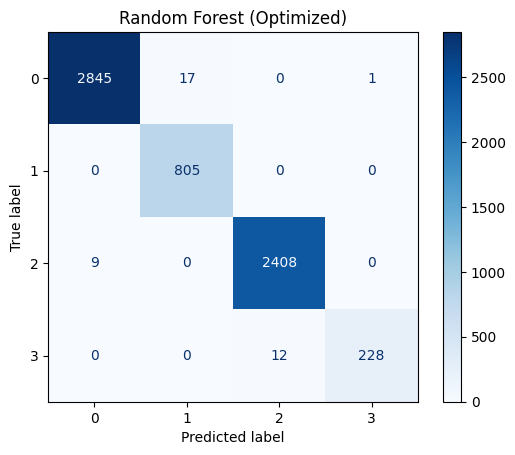

In [7]:
from models import train_RF
modelRF = train_RF(features_all, features_all_test, train_labels, train_labels_test)


📈 Training Logistic Regression (optimized)...
🔍 Mẫu dòng đầu tiên (sau fit scaler):
x_mean              0.013950
y_mean              0.591800
z_mean              0.731450
x_std               0.100172
y_std               0.067900
z_std               0.045301
x_aad               0.086525
y_aad               0.054400
z_aad               0.036475
x_median           -0.041000
y_median            0.626000
z_median            0.709000
x_mad               0.002000
y_mad               0.003000
z_mad               0.003000
x_IQR               0.055500
y_IQR               0.016000
z_IQR               0.012750
x_neg_count        15.000000
y_neg_count         0.000000
z_neg_count         0.000000
x_pos_count         5.000000
y_pos_count        20.000000
z_pos_count        20.000000
x_above_mean        5.000000
y_above_mean       15.000000
z_above_mean        5.000000
x_peak_count        3.000000
y_peak_count        4.000000
z_peak_count        4.000000
x_skewness          1.158828
y_skewness       

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


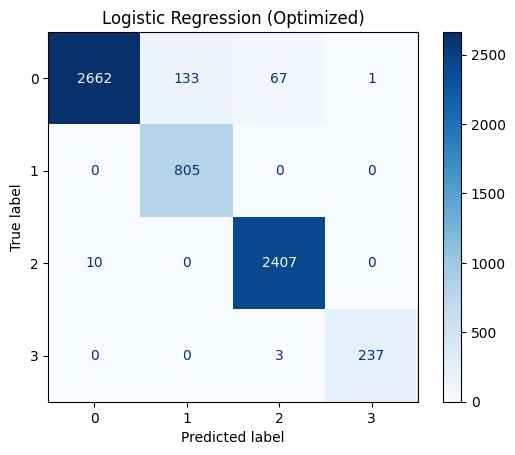

In [8]:
from models import train_LR
modelLR, scalerLr = train_LR(features_all, features_all_test, train_labels, train_labels_test)

💡 Training SVM (optimized)...
🎯 Test Accuracy: 0.9393
              precision    recall  f1-score   support

           1       1.00      0.87      0.93      2863
           2       0.84      1.00      0.91       805
           3       0.92      1.00      0.96      2417
           4       1.00      0.99      0.99       240

    accuracy                           0.94      6325
   macro avg       0.94      0.96      0.95      6325
weighted avg       0.95      0.94      0.94      6325



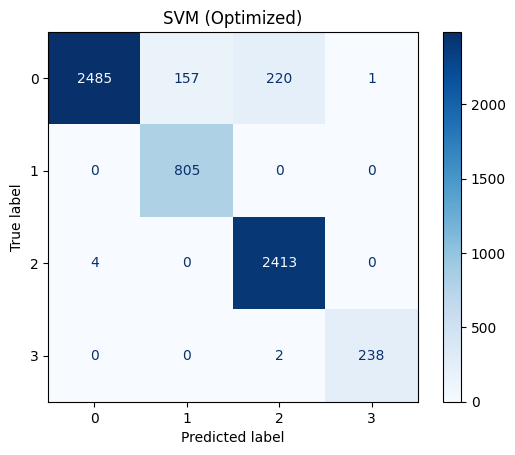

In [9]:
from models import train_SVM
modelSVM, scalerSVM = train_SVM(features_all, features_all_test, train_labels, train_labels_test)

🔥 Training Gradient Boosting (optimized)...
🎯 Test Accuracy: 0.9968
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2863
           2       1.00      1.00      1.00       805
           3       1.00      1.00      1.00      2417
           4       1.00      0.97      0.99       240

    accuracy                           1.00      6325
   macro avg       1.00      0.99      0.99      6325
weighted avg       1.00      1.00      1.00      6325



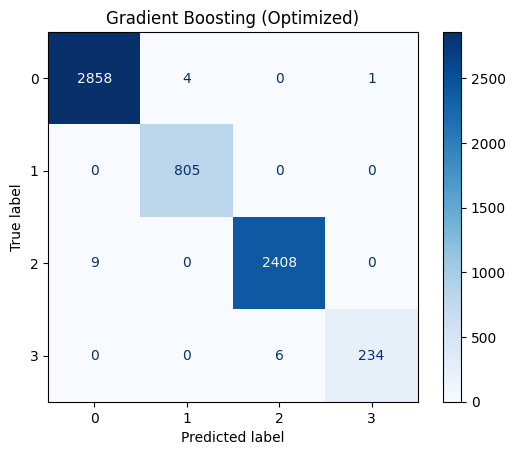

In [10]:
from models import train_GB
modelGB, scalerGB = train_GB(features_all, features_all_test, train_labels, train_labels_test)


In [11]:
from optimation import get_model_size_kb

get_model_size_kb(modelRF, None, "RandomForest")
get_model_size_kb(modelLR, scalerLr, "LogisticRegression")
get_model_size_kb(modelSVM, scalerSVM, "SVM")
get_model_size_kb(modelGB, None, "GradientBoosting")

📦 RandomForest: Model = 86.73 KB | Scaler = 0.00 KB | Total = 86.73 KB
🌲  → Tổng số nút trong mô hình cây: 814
----------------------------------------------------------------------
📦 LogisticRegression: Model = 2.18 KB | Scaler = 2.45 KB | Total = 4.63 KB
🔢  → Số tham số huấn luyện: 168
----------------------------------------------------------------------
📦 SVM: Model = 49.28 KB | Scaler = 2.45 KB | Total = 51.73 KB
🔢  → Số tham số huấn luyện: 252
----------------------------------------------------------------------
📦 GradientBoosting: Model = 135.31 KB | Scaler = 0.00 KB | Total = 135.31 KB
🌲  → Tổng số nút trong mô hình cây: 1192
----------------------------------------------------------------------


135.3095703125


================= 🧩 TỶ LỆ 100.00% =================
📈 Training Logistic Regression (optimized)...
🔍 Mẫu dòng đầu tiên (sau fit scaler):
x_mean             -0.021750
y_mean             -0.411350
z_mean              0.866450
x_std               0.001785
y_std               0.009216
z_std               0.003735
x_aad               0.001600
y_aad               0.008215
z_aad               0.003395
x_median           -0.023000
y_median           -0.415000
z_median            0.864500
x_mad               0.001000
y_mad               0.005000
z_mad               0.002000
x_IQR               0.003000
y_IQR               0.015750
z_IQR               0.006500
x_neg_count        20.000000
y_neg_count        20.000000
z_neg_count         0.000000
x_pos_count         0.000000
y_pos_count         0.000000
z_pos_count        20.000000
x_above_mean        8.000000
y_above_mean        9.000000
z_above_mean        9.000000
x_peak_count        0.000000
y_peak_count        0.000000
z_peak_count        0.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


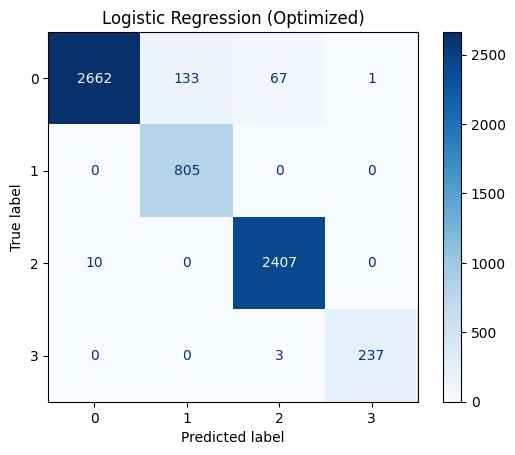


================= 🧩 TỶ LỆ 50.00% =================
📈 Training Logistic Regression (optimized)...
🔍 Mẫu dòng đầu tiên (sau fit scaler):
x_mean             -0.021750
y_mean             -0.411350
z_mean              0.866450
x_std               0.001785
y_std               0.009216
z_std               0.003735
x_aad               0.001600
y_aad               0.008215
z_aad               0.003395
x_median           -0.023000
y_median           -0.415000
z_median            0.864500
x_mad               0.001000
y_mad               0.005000
z_mad               0.002000
x_IQR               0.003000
y_IQR               0.015750
z_IQR               0.006500
x_neg_count        20.000000
y_neg_count        20.000000
z_neg_count         0.000000
x_pos_count         0.000000
y_pos_count         0.000000
z_pos_count        20.000000
x_above_mean        8.000000
y_above_mean        9.000000
z_above_mean        9.000000
x_peak_count        0.000000
y_peak_count        0.000000
z_peak_count        0.0

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


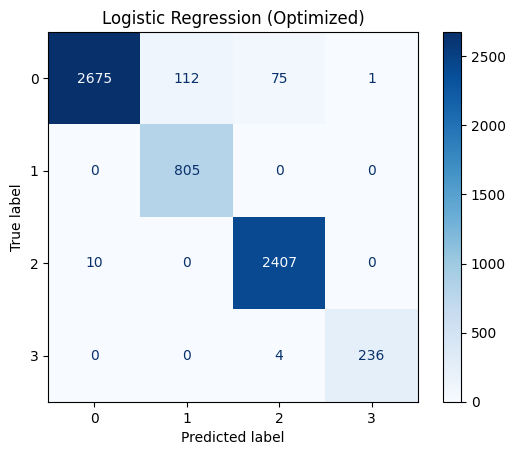


================= 🧩 TỶ LỆ 20.00% =================
📈 Training Logistic Regression (optimized)...
🔍 Mẫu dòng đầu tiên (sau fit scaler):
x_mean             -0.021750
y_mean             -0.411350
z_mean              0.866450
x_std               0.001785
y_std               0.009216
z_std               0.003735
x_aad               0.001600
y_aad               0.008215
z_aad               0.003395
x_median           -0.023000
y_median           -0.415000
z_median            0.864500
x_mad               0.001000
y_mad               0.005000
z_mad               0.002000
x_IQR               0.003000
y_IQR               0.015750
z_IQR               0.006500
x_neg_count        20.000000
y_neg_count        20.000000
z_neg_count         0.000000
x_pos_count         0.000000
y_pos_count         0.000000
z_pos_count        20.000000
x_above_mean        8.000000
y_above_mean        9.000000
z_above_mean        9.000000
x_peak_count        0.000000
y_peak_count        0.000000
z_peak_count        0.0

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


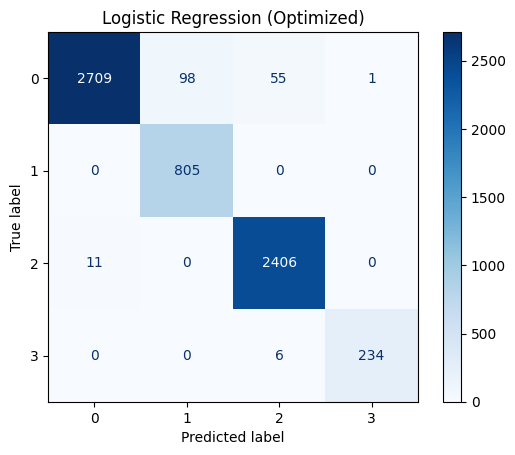


================= 🧩 TỶ LỆ 10.00% =================
📈 Training Logistic Regression (optimized)...
🔍 Mẫu dòng đầu tiên (sau fit scaler):
x_mean             -0.021750
y_mean             -0.411350
z_mean              0.866450
x_std               0.001785
y_std               0.009216
z_std               0.003735
x_aad               0.001600
y_aad               0.008215
z_aad               0.003395
x_median           -0.023000
y_median           -0.415000
z_median            0.864500
x_mad               0.001000
y_mad               0.005000
z_mad               0.002000
x_IQR               0.003000
y_IQR               0.015750
z_IQR               0.006500
x_neg_count        20.000000
y_neg_count        20.000000
z_neg_count         0.000000
x_pos_count         0.000000
y_pos_count         0.000000
z_pos_count        20.000000
x_above_mean        8.000000
y_above_mean        9.000000
z_above_mean        9.000000
x_peak_count        0.000000
y_peak_count        0.000000
z_peak_count        0.0

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


🎯 Test Accuracy: 0.9742
              precision    recall  f1-score   support

           1       0.99      0.95      0.97      2863
           2       0.88      1.00      0.93       805
           3       0.99      0.99      0.99      2417
           4       1.00      0.97      0.99       240

    accuracy                           0.97      6325
   macro avg       0.96      0.98      0.97      6325
weighted avg       0.98      0.97      0.97      6325



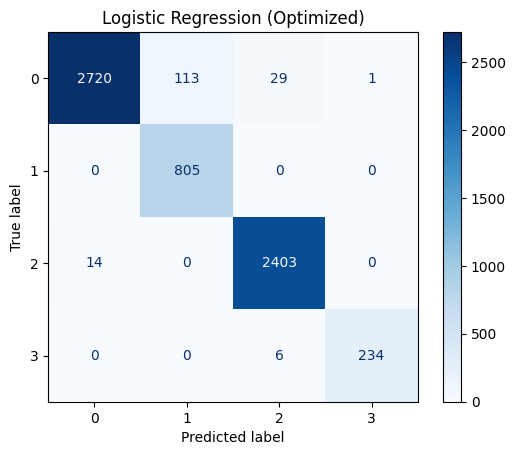


================= 🧩 TỶ LỆ 5.00% =================
📈 Training Logistic Regression (optimized)...
🔍 Mẫu dòng đầu tiên (sau fit scaler):
x_mean             -0.021750
y_mean             -0.411350
z_mean              0.866450
x_std               0.001785
y_std               0.009216
z_std               0.003735
x_aad               0.001600
y_aad               0.008215
z_aad               0.003395
x_median           -0.023000
y_median           -0.415000
z_median            0.864500
x_mad               0.001000
y_mad               0.005000
z_mad               0.002000
x_IQR               0.003000
y_IQR               0.015750
z_IQR               0.006500
x_neg_count        20.000000
y_neg_count        20.000000
z_neg_count         0.000000
x_pos_count         0.000000
y_pos_count         0.000000
z_pos_count        20.000000
x_above_mean        8.000000
y_above_mean        9.000000
z_above_mean        9.000000
x_peak_count        0.000000
y_peak_count        0.000000
z_peak_count        0.00

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


🎯 Test Accuracy: 0.9660
              precision    recall  f1-score   support

           1       0.99      0.93      0.96      2863
           2       0.83      1.00      0.91       805
           3       0.98      0.99      0.99      2417
           4       1.00      0.98      0.99       240

    accuracy                           0.97      6325
   macro avg       0.95      0.98      0.96      6325
weighted avg       0.97      0.97      0.97      6325



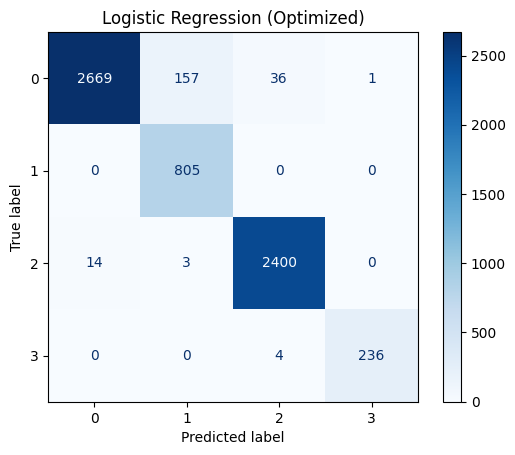


================= 🧩 TỶ LỆ 0.50% =================
📈 Training Logistic Regression (optimized)...
🔍 Mẫu dòng đầu tiên (sau fit scaler):
x_mean             -0.021750
y_mean             -0.411350
z_mean              0.866450
x_std               0.001785
y_std               0.009216
z_std               0.003735
x_aad               0.001600
y_aad               0.008215
z_aad               0.003395
x_median           -0.023000
y_median           -0.415000
z_median            0.864500
x_mad               0.001000
y_mad               0.005000
z_mad               0.002000
x_IQR               0.003000
y_IQR               0.015750
z_IQR               0.006500
x_neg_count        20.000000
y_neg_count        20.000000
z_neg_count         0.000000
x_pos_count         0.000000
y_pos_count         0.000000
z_pos_count        20.000000
x_above_mean        8.000000
y_above_mean        9.000000
z_above_mean        9.000000
x_peak_count        0.000000
y_peak_count        0.000000
z_peak_count        0.00

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


🎯 Test Accuracy: 0.9135
              precision    recall  f1-score   support

           1       0.89      0.93      0.91      2863
           2       0.81      1.00      0.89       805
           3       0.99      0.86      0.92      2417
           4       0.97      0.92      0.94       240

    accuracy                           0.91      6325
   macro avg       0.92      0.93      0.92      6325
weighted avg       0.92      0.91      0.91      6325



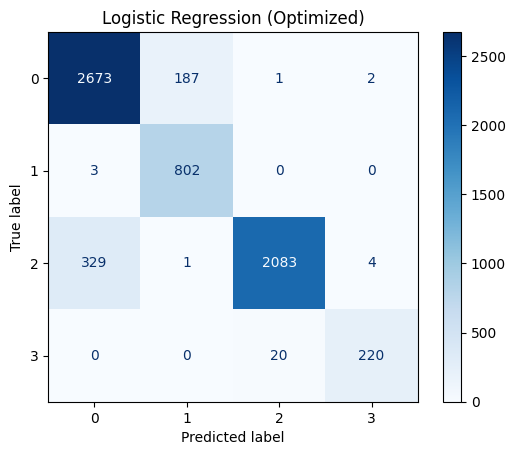


================= 🧩 TỶ LỆ 0.10% =================
📈 Training Logistic Regression (optimized)...
🔍 Mẫu dòng đầu tiên (sau fit scaler):
x_mean             -0.021750
y_mean             -0.411350
z_mean              0.866450
x_std               0.001785
y_std               0.009216
z_std               0.003735
x_aad               0.001600
y_aad               0.008215
z_aad               0.003395
x_median           -0.023000
y_median           -0.415000
z_median            0.864500
x_mad               0.001000
y_mad               0.005000
z_mad               0.002000
x_IQR               0.003000
y_IQR               0.015750
z_IQR               0.006500
x_neg_count        20.000000
y_neg_count        20.000000
z_neg_count         0.000000
x_pos_count         0.000000
y_pos_count         0.000000
z_pos_count        20.000000
x_above_mean        8.000000
y_above_mean        9.000000
z_above_mean        9.000000
x_peak_count        0.000000
y_peak_count        0.000000
z_peak_count        0.00

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


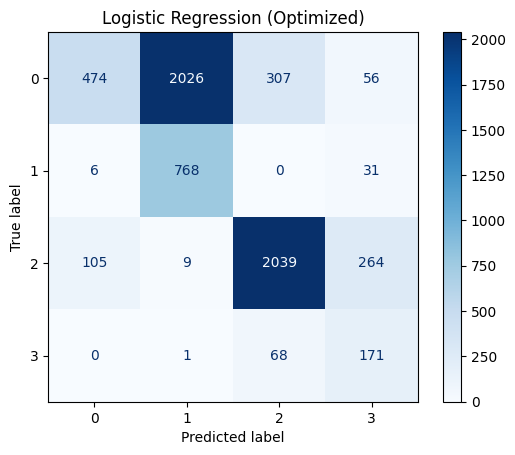


🎯 KẾT QUẢ LOGISTIC REGRESSION:
 Tỷ lệ dữ liệu (%)  Số mẫu train  Độ chính xác (%)  Model size (KB)
             100.0         15674             96.62             4.63
              50.0          7835             96.81             4.63
              20.0          3133             97.30             4.63
              10.0          1566             97.42             4.63
               5.0           781             96.60             4.63
               0.5            75             91.35             4.63
               0.1            13             54.58             4.63


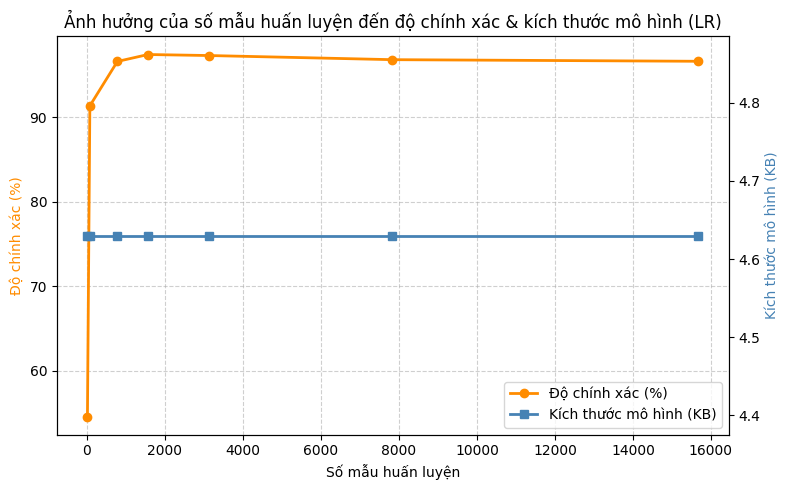

In [ ]:
from models import train_LR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import joblib, os, tempfile

# ------------------------------------------------------------
# 1️⃣ Hàm giảm dữ liệu theo tỷ lệ
# ------------------------------------------------------------
def reduce_by_ratio(X, y, ratio=1.0, random_state=42):
    """
    Giảm dữ liệu theo tỷ lệ (ratio) cho từng nhãn để giữ cân bằng lớp.
    Nếu ratio quá nhỏ, vẫn giữ ít nhất 1 mẫu/lớp để tránh lỗi.
    """
    np.random.seed(random_state)
    X_new, y_new = [], []
    y = np.array(y)

    for label in np.unique(y):
        idx = np.where(y == label)[0]
        n_keep = max(1, int(len(idx) * ratio))  # ✅ đảm bảo có ít nhất 1 mẫu
        chosen = np.random.choice(idx, n_keep, replace=False)
        X_new.append(X.iloc[chosen])
        y_new.append(y[chosen])

    return pd.concat(X_new), np.concatenate(y_new)


# ------------------------------------------------------------
# 2️⃣ Hàm đo kích thước mô hình (KB)
# ------------------------------------------------------------
def get_model_size_kb(model):
    """Lưu model tạm và tính kích thước (KB)"""
    with tempfile.NamedTemporaryFile(delete=False, suffix=".pkl") as tmp:
        joblib.dump(model, tmp.name)
        size_kb = os.path.getsize(tmp.name) / 1024
    os.remove(tmp.name)
    return round(size_kb, 2)


# ------------------------------------------------------------
# 3️⃣ Huấn luyện Logistic Regression với nhiều mức dữ liệu
# ------------------------------------------------------------
def train_with_multiple_ratios_LR(train_df, test_df, label_train, label_test,
                                  model_func=train_LR,
                                  ratios=[1.0, 0.5, 0.2, 0.1, 0.05 , 0.005,  0.001]):
    """
    Huấn luyện Logistic Regression với nhiều tỷ lệ dữ liệu train khác nhau.
    Ghi nhận độ chính xác + kích thước mô hình.
    """
    results = []

    for r in ratios:
        print(f"\n================= 🧩 TỶ LỆ {r*100:.2f}% =================")
        X_sub, y_sub = reduce_by_ratio(train_df, label_train, ratio=r)

        # Nếu tập quá nhỏ, bỏ qua
        if len(X_sub) < 10:
            print(f"⚠️ Bỏ qua: chỉ còn {len(X_sub)} mẫu.")
            continue

        # train_LR trả về (model, scaler)
        model, scaler = model_func(X_sub, test_df, y_sub, label_test)

        # Scale test lại trước khi predict
        X_test_scaled = scaler.transform(test_df)
        y_pred = model.predict(X_test_scaled)
        acc = accuracy_score(label_test, y_pred)

        # ✅ Tính kích thước mô hình
        model_size_kb = get_model_size_kb(model)
        scaler_size_kb = get_model_size_kb(scaler)
        total_size_kb = round(model_size_kb + scaler_size_kb, 2)

        results.append({
            "Tỷ lệ dữ liệu (%)": round(r*100, 2),
            "Số mẫu train": len(X_sub),
            "Độ chính xác (%)": round(acc * 100, 2),
            "Model size (KB)": total_size_kb
        })

    # --- Kết quả ra bảng ---
    results_df = pd.DataFrame(results)
    print("\n🎯 KẾT QUẢ LOGISTIC REGRESSION:")
    print(results_df.to_string(index=False))

    # --- Biểu đồ trực quan ---
    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax2 = ax1.twinx()

    # Biểu đồ đường cho độ chính xác
    ax1.plot(results_df["Số mẫu train"], results_df["Độ chính xác (%)"],
             marker='o', linewidth=2, color='darkorange', label='Độ chính xác (%)')



    # Thiết lập nhãn trục
    ax1.set_xlabel("Số mẫu huấn luyện")
    ax1.set_ylabel("Độ chính xác (%)", color='darkorange')

    plt.title("Ảnh hưởng của số mẫu huấn luyện đến độ chính xác với toàn bộ dữ liệu miền thời gian")
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Gộp chú thích
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='best')

    plt.tight_layout()
    plt.show()

    return results_df


# ------------------------------------------------------------
# 4️⃣ Gọi chạy thử
# ------------------------------------------------------------
ratios = [1.0, 0.5, 0.2, 0.1, 0.05,  0.005, 0.001]
results_df = train_with_multiple_ratios_LR(
    features_all, features_all_test, train_labels, train_labels_test, train_LR, ratios)
